In [1]:
import pandas as pd
import numpy as np

In [2]:
# random seed

np.random.seed(42)

set1no = 900
set2no = 100

In [3]:
df1 = pd.DataFrame(
    {
        "feature_1" : np.random.normal(loc=0, scale=1, size=set1no),
        "feature_2" : np.random.normal(loc=0, scale=1, size=set1no),
        "target" : [0] * set1no
    }
)


df2 = pd.DataFrame(
    {
        "feature_1" : np.random.normal(loc=0, scale=1, size=set2no),
        "feature_2" : np.random.normal(loc=0, scale=1, size=set2no),
        "target" : [1] * set2no
    }
)

In [4]:
df1.head()

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


In [5]:
df2.head()

,feature_1,feature_2,target
0,1.901191,0.696954,1
1,-0.060661,-0.333819,1
2,-0.708407,1.173125,1
3,-1.513714,0.369642,1
4,-1.803140,-0.107302,1


In [6]:
df = pd.concat([df1,df2]).reset_index(drop = True)    # Bu iki adet dataframe'i birleştirmek için kullanılır.

In [7]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [8]:
df["target"].unique()     # target sütununu oluşturan şeylerin neler olduğuna bakıyorum.

array([0, 1], dtype=int64)

In [9]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

Burada normal bir ML algoritması kullanılarak işlem yapılabilir fakat sayısal  bir dengesizlik olduğu için burada bir dengeleme işlemi yapmamız gerekebilir.

- Upsampling -> Az olan veriyi çoğaltma

- Downsampling -> Çok olan veriyi azaltma

## UPSAMPLING and DOWNSAMPLING

In [10]:
df_minority = df[df["target"] == 1]    # Az olan veriyi df_minority adında birleştirdim.

In [11]:
df_minority

,feature_1,feature_2,target
900,1.901191,0.696954,1
901,-0.060661,-0.333819,1
902,-0.708407,1.173125,1
903,-1.513714,0.369642,1
904,-1.803140,-0.107302,1
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [12]:
df_majority = df[df["target"] == 0]     # Çok olan veriyi df_majority adında birleştirdim.

In [13]:
df_majority

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
895,0.648710,-0.751969,0
896,-0.167118,-0.319054,0
897,0.146714,-0.796026,0
898,1.206509,1.076007,0


Resample işlemlerini yapabilmek için aşağıdaki _SKLEARN_ kütüphanesini kullanacağız.

In [14]:
from sklearn.utils import resample

------------------
## Upsamling

In [15]:
df_minority_upsampled = resample(df_minority, replace = True, n_samples=len(df_majority), random_state=42)

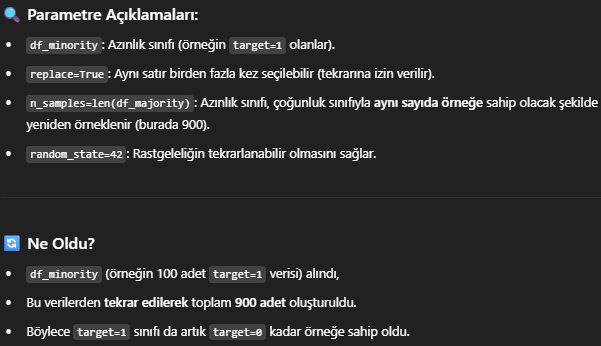

In [16]:
df_minority_upsampled

,feature_1,feature_2,target
951,1.775311,1.261922,1
992,-0.436386,1.188913,1
914,-0.268531,-1.801058,1
971,-0.214921,-2.940389,1
960,-0.134309,-0.054894,1
...,...,...,...
952,-1.193637,-0.905732,1
965,-1.662492,0.089581,1
976,-0.562168,1.124113,1
942,-0.548725,0.269127,1


Sayısını 100'den 900'e çıkardığım target = 1 olan df ile sayısı zaten 900 olan df_majority'i birleştiriyorum.

In [17]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [18]:
df_upsampled["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

-----------------
## Downsampling

In [19]:
df_majority_downsampled = resample(df_majority, replace = True, n_samples=len(df_minority), random_state=42)

In [20]:
df_majority_downsampled

,feature_1,feature_2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0
...,...,...,...
201,0.560785,-2.896255,0
269,0.130741,0.853416,0
862,1.547505,0.075434,0
815,-1.485560,-0.090533,0


In [21]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled

In [22]:
df_downsampled["target"].value_counts()

target
0    100
1    100
Name: count, dtype: int64

------
## SMOTE (Synthetic Minority Over-sampling Technique)

Azınlık sınıfına yeni sentetik örnekler (kopya değil!) üreterek sınıf dengesizliğini gideren bir veri artırma (data augmentation) tekniğidir.

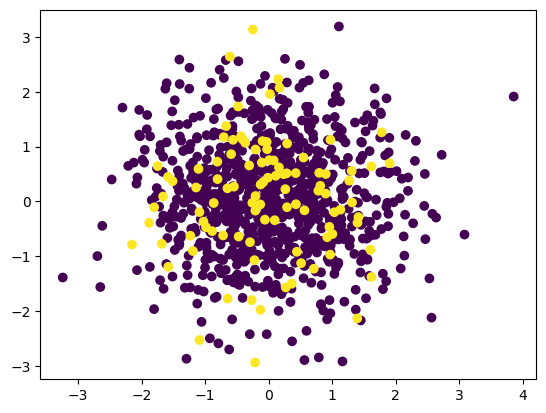

In [23]:
import matplotlib.pyplot as plt
plt.scatter(df["feature_1"], df["feature_2"], c=df["target"])    # Gördüğümüz üzere morlar target 0, sarılar ise target 1

Burada kullanacağımız kütüphane aşağıdaki : 

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
oversample = SMOTE()

In [26]:
(x,y) = oversample.fit_resample(df[["feature_1", "feature_2"]], df["target"])

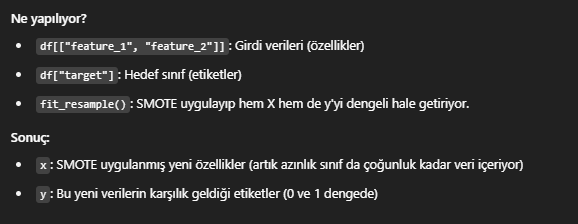

In [27]:
x

,feature_1,feature_2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,0.701868,-0.173309
1796,1.545917,-1.335943
1797,1.358114,-0.225781
1798,0.486916,-0.147628


In [28]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [29]:
df1=pd.DataFrame(x,columns=['feature_1','feature_2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

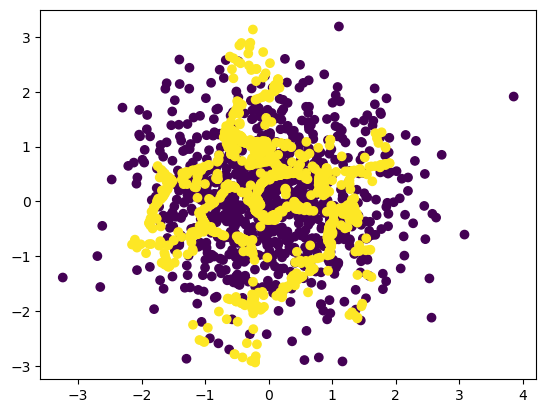

In [30]:
plt.scatter(oversample_df['feature_1'],oversample_df['feature_2'],c=oversample_df['target'])

In [31]:
oversample_df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
1795,0.701868,-0.173309,1
1796,1.545917,-1.335943,1
1797,1.358114,-0.225781,1
1798,0.486916,-0.147628,1


In [32]:
# Scaling and Model Training

In [ ]:
from s